Practice example from https://github.com/Limor-Raviv/Tutorial_Agent_Based_Models/blob/master/Part%202%20-%20A%20Simple%20Agent%20Based%20Model%20in%20Python.ipynb

In [98]:
# Setting the parameters

vowels = ['a', 'i']

personalities = ['F', 'S'] # F= Flexible, S=Stubborn

In [99]:
def make_agent(vowel, personality):
    return [vowel, personality]

# For examaple, we can create a flexible agent with the vowel 'i' using our function

agent_one = make_agent(vowels[1], personalities[0])
print(agent_one)

['i', 'F']


In [101]:

# Create a function that generates a population of N identical agents with given parameters

def make_population_identical(N):
    
    population = []
    
    for i in range(N):
        
        agent = make_agent(vowels[1], personalities[0])
        
        population.append(agent)

    return population


# Call the function to make a population of 5 identical agents

population_test = make_population_identical(5)
print(population_test)

[['i', 'F'], ['i', 'F'], ['i', 'F'], ['i', 'F'], ['i', 'F']]


In [102]:

# Create a function that generates of population of N agents with randomly selected parameters from each list
# using "random.choice()"

import random

def make_population_random(N):
    
    population = []
    
    for i in range(N):
        
        v = random.choice(vowels)
        
        p = random.choice(personalities)
        
        agent = make_agent(v, p)
        
        population.append(agent)

    return population

In [103]:
# Call the function to make a population of 5 random agents
population = make_population_random(5)
print(population)

[['a', 'S'], ['i', 'F'], ['a', 'F'], ['a', 'S'], ['a', 'S']]


In [104]:
# You can achieve the same goal using "random.int()" and using the index of the lists of possible parameters

def make_population(N):
    
    population = []
    
    for i in range(N):
        
        v = random.randint(0,1)
        
        p = random.randint(0,1)
        
        agent = make_agent(vowels[v], personalities[p])
        
        population.append(agent)

    return population
    

In [105]:
# Create a function that calculates the proportion of agents with the variant 'a' in the population

def count(population):
    t = 0. # must be a float!     
    for agent in population:
        if agent[0] == 'a':
            t += 1            # The syntax =+ Adds 1 to t (or: t = t + 1)
    return t / len(population)

In [106]:
from numpy.random import choice

def choose_pair(population):
    i = random.randint(0, len(population) - 1) # phyton counts from 0, so pop(8) is an error
    j = random.randint(0, len(population) - 1)
    
    while i == j:
        j = random.randint(0, len(population) - 1) # make sure the same agent is not selected twice
        
    return population[i], population[j]


In [107]:
# Create a function that only updates agents using "pass" (which means do nothing in Python)

def interact(listener,producer): 
    
    if listener[0] == producer[0]:
        pass   # do nothing
    else:
        if listener[1]=='S':
            pass
        else:
            listener[0]=deepcopy(producer[0])

In [110]:
# Create a function that simulates a community of size N interacting randomly for K times       

def simulate(n, k):
    
    population = make_population(n)
    
    # print "Initial Population:", population
    
    proportion = [] # make an empty list to keep track of the porportions after every interaction
    
    for i in range(k):
        
        listener,producer = choose_pair(population) # choose a pair from the population
        
        interact(listener,producer)  # make the chosen pair interact
        
        proportion.append(count(population)) # track the proportion of the vowels in the population during intrtaction
    
    return population, proportion


Final Population: [['i', 'F'], ['a', 'F'], ['a', 'F'], ['a', 'F'], ['a', 'S'], ['a', 'F'], ['a', 'F'], ['a', 'S'], ['a', 'F'], ['a', 'F'], ['i', 'S'], ['a', 'S'], ['a', 'F'], ['a', 'F'], ['a', 'F'], ['a', 'F'], ['a', 'S'], ['a', 'F'], ['i', 'S'], ['a', 'F']]


Text(0.5, 0, 'Time [No. of interactions]')

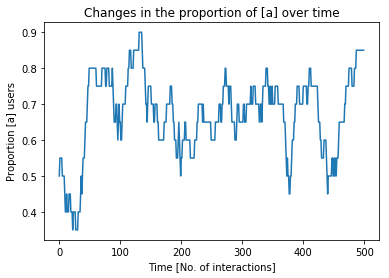

In [111]:
# Simulate 500 interctions between 20 agents 
new_population, proportion = simulate(20, 500)
print("Final Population:", new_population)

# Make a plot of the changes in proportion of 'a' over interactions 

%matplotlib inline 
#put plot in the notebook
import matplotlib.pyplot as plt # importing a plotting library
plt.plot(proportion)

# and add some details to the plot
plt.title('Changes in the proportion of [a] over time')
plt.ylabel('Proportion [a] users')
plt.xlabel('Time [No. of interactions]')

In [112]:
# Create a function that runs s simulations of a community of size N interacting randomly for K times    

def batch_simulate(n,k,s):
    batch_proportions=[]
    for i in range(s):
        new_population, proportion = simulate(n, k)
        batch_proportions.append(proportion)
    return batch_proportions